## Purpose: Non-linear fit

 Demonstration: 
     1. Arctan Model
     2. LevenbergMarquardtFitter
 
 Author: Do Kester


import stuff

In [46]:
import numpy as numpy
import math

from ArctanModel import ArctanModel
from PolynomialModel import PolynomialModel
from LevenbergMarquardtFitter import LevenbergMarquardtFitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [33]:
N = 101
x0 = 60             # x position of arctanian
seed = 3456


make data as a set of +1 or -1 values.

In [78]:
x = numpy.linspace( 20.0, 100.0, N, dtype=float )
y = numpy.where( ( x + 10 * numpy.random.randn( N ) ) > x0, 1.0, 0.0 )
#x += x0


Define the model

In [79]:
arctan = ArctanModel()
arctan += PolynomialModel(0)
print( arctan )
initial = [0.5,50,1,-0.5]
arctan.parameters = initial


Arctan: f( x:p ) = p_0 * arctan( p_2 * ( x - p_1 ) ) +
Polynomial: f( x:p ) = p_0


define the fitter: LevenbergMarquart

In [80]:
fitter = LevenbergMarquardtFitter( x, arctan )
 
# find the parameters
param = fitter.fit( y )

  

In [81]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    0.360   61.591    0.173    0.525]
StDevs     : [    0.039    1.545    0.074    0.032]
Chisq      :     6.408
Scale      :     0.257
Covar matrix :
[[    0.002    0.002   -0.002    0.000]
 [    0.002    2.388   -0.003    0.031]
 [   -0.002   -0.003    0.005   -0.000]
 [    0.000    0.031   -0.000    0.001]]


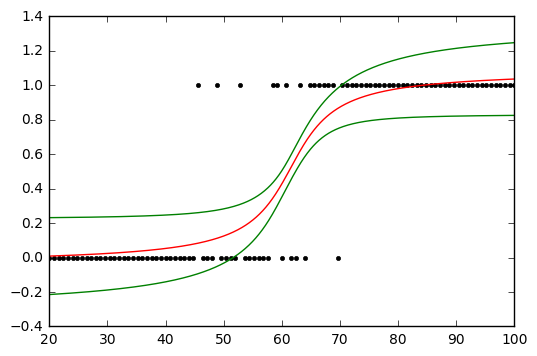

In [82]:
plotFit( x, y, arctan, ftr=fitter )